# Data Analysis Project Life Cycle
- **Business Problem Understanding**
- **Data Collection**
- **Data Pre-processing**
- **Exploratory Data Analysis**
- **Reporting**
## Business Problem
**Client wants us to analyze diwali sales data in order to understand the trend, insights, top performing products, categories, zones so that they can prepare better to improve sales**
## Data Collection
- Client has provided historial data in csv file
- Link: https://drive.google.com/file/d/1mGY1doT8RRTgIS0eZsiexHOjUIel9pvo/view?usp=drive_link


In [7]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Loading the dataset
data = pd.read_csv(r"C:\Users\V\Downloads\Diwali Sales Data.csv",encoding='unicode_escape')
# Checking the data
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952,NaN,NaN
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934,NaN,NaN
2,1001990.0,Bindu,P00118542,F,26-35,35,1.0,Uttar Pradesh,Central,Automobile,Auto,3.0,23924,NaN,NaN
3,1001425.0,Sudevi,P00237842,M,0-17,16,0.0,Karnataka,Southern,Construction,Auto,2.0,23912,NaN,NaN
4,1000588.0,Joni,P00057942,M,26-35,28,1.0,Gujarat,Western,Food Processing,Auto,2.0,23877,NaN,NaN


# Creating a copy of the dataset



In [9]:
df = data.copy()

## Data Pre-processing
- **Data Profiling**
- **Data Cleaning**
- **Data Consistancy**
- **Data Formating**
- **Outlier Detection & Removal**

In [10]:
df.shape


(11345, 15)

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11345 entries, 0 to 11344
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11321 non-null  float64
 1   Cust_name         11344 non-null  object 
 2   Product_ID        11341 non-null  object 
 3   Gender            11341 non-null  object 
 4   Age Group         11339 non-null  object 
 5   Age               11334 non-null  object 
 6   Marital_Status    11339 non-null  float64
 7   State             11332 non-null  object 
 8   Zone              11334 non-null  object 
 9   Occupation        11339 non-null  object 
 10  Product_Category  11334 non-null  object 
 11  Orders            11342 non-null  float64
 12  Amount            11331 non-null  object 
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(5), object(10)
memory usage: 1.3+ MB


In [12]:
# Null values
null_values = df.isna().sum()
null_values


User_ID                24
Cust_name               1
Product_ID              4
Gender                  4
Age Group               6
Age                    11
Marital_Status          6
State                  13
Zone                   11
Occupation              6
Product_Category       11
Orders                  3
Amount                 14
Status              11345
unnamed1            11345
dtype: int64

In [13]:
null_values_percentage = (df.isna().sum()/(df.shape[0]))*100
null_values_percentage
pd.concat([null_values, null_values_percentage], axis =1)

,0,1
User_ID,24,0.211547
Cust_name,1,0.008814
Product_ID,4,0.035258
Gender,4,0.035258
Age Group,6,0.052887
Age,11,0.096959
Marital_Status,6,0.052887
State,13,0.114588
Zone,11,0.096959
Occupation,6,0.052887


In [14]:
# All columns
all_columns = df.columns
all_columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [15]:
# Numeric columns
numeric_columns = df.select_dtypes(include = np.number).columns
numeric_columns

Index(['User_ID', 'Marital_Status', 'Orders', 'Status', 'unnamed1'], dtype='object')

In [16]:
# Non-Numeric columns
non_numeric_columns = df.select_dtypes(include = object).columns
non_numeric_columns


Index(['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age', 'State',
       'Zone', 'Occupation', 'Product_Category', 'Amount'],
      dtype='object')

In [17]:
# Duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11340    False
11341    False
11342    False
11343     True
11344    False
Length: 11345, dtype: bool

In [18]:
# Filtering out the duplicate entries
df = df[~df.duplicated()]
df[df.duplicated()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1


### Data Profiling
1. **Amount**
    - Need to change the data type from object to integer
    - The rows corresponding to null values should be dropped
    - Need to drop the rows corresponding to values 'abcds'
    
2. **Status & unnamed1**
    - No data, should be dropped

3. **Orders**
    - Null values has to be dropped
    - Theres is outliers which can be removed

4. **State**
    - Andhra\xa0Pradesh & Nndhra\xa0Pradesh should be replaced with 'Andhra Pradesh'
    - Drop the rows corresponding to null values

5. **Zone**
    - Drop the rows corresponding to null values
    - 'Zentral' should be replaced with 'Central

6. **Product_ID**
    - Drop the rows corresponding to null values

7. **Marital_Status**
    - Null values can be replaced with mode
    - Will create a new column where '1' can be replaced with 'Married' and '0' with unmarried
8. **Age**
    - 'Age' can be replaced with mode
    - Null values can be replaced with mode
    - Data type needs to be changed from object to numeric

9. **Age Group**
    - 'low-high' can be replaced with mode
    - Null values can be replaced with mode
    
10. **Product_Category**
    - Null values can be dropped

11. **User_ID, Gender, Occupation**
    - Null values can be replaced with mod

### Data Cleaning
#### Status & unnamed1


In [19]:
# Dropping columns
df.drop(['Status', 'unnamed1'],axis =1, inplace = True)
df.head(2)


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934


#### Amount 

In [20]:
# Changing the data type
df['Amount'] = pd.to_numeric(df['Amount'], errors = 'coerce')

# errors = coerce will convert unsupported values into null values
# Dropping rows corresponding to null values in the columns : 
#['Amount', 'Orders', 'State', 'Zone', 'Product_ID', 'Product_Category']
df.dropna(subset = ['Amount', 'Orders', 'State', 'Zone', 'Product_ID', 'Product_Category'], inplace = True)

#### State & Zone

In [21]:
# Replacing the type
df['State'] = df['State'].str.replace('Andhra\xa0Pradesh',  'Andhra Pradesh')
df['State'] = df['State'].str.replace('Nndhra\xa0Pradesh',  'Andhra Pradesh')
df['Zone'] = df['Zone'].str.replace('Zentral',  'Central')
df['Zone'].unique()


array(['Western', 'Southern', 'Central', 'Northern', 'Eastern'],
      dtype=object)

#### Product_ID
 **>>Already Cleaned**

#### Marital_Status


In [22]:
# Replacing the null values with mode
marital_status_mode = df['Marital_Status'].mode()[0]
marital_status_mode


0.0

In [23]:
df['Marital_Status'] = df['Marital_Status'].fillna(marital_status_mode)
df['Marital_Status']

0        0.0
1        1.0
2        1.0
3        0.0
4        1.0
        ... 
11336    0.0
11337    0.0
11338    1.0
11339    0.0
11340    0.0
Name: Marital_Status, Length: 11254, dtype: float64

In [24]:
# Creating a new column with marital_status
df['marraige_status'] = df['Marital_Status'].apply(lambda x: 'Married' if(x ==1.) else 'Unmarried')
df['marraige_status']

0        Unmarried
1          Married
2          Married
3        Unmarried
4          Married
           ...    
11336    Unmarried
11337    Unmarried
11338      Married
11339    Unmarried
11340    Unmarried
Name: marraige_status, Length: 11254, dtype: object

#### Age

In [25]:

# Changing the data type from object to numeric
df['Age'] = pd.to_numeric(df['Age'], errors = 'coerce') 

# Replace the null values with mode
age_mode = df['Age'].mode()[0]
df['Age'] = df['Age'].fillna(age_mode)



#### Age Group

In [26]:

# Replacing null value and typo with mode
age_group_mode = df['Age Group'].mode()[0]
age_group_mode
df['Age Group'] = df['Age Group'].str.replace('low-high', age_group_mode)
df['Age Group'] = df['Age Group'].fillna(age_group_mode)
df.isna().sum()

User_ID             23
Cust_name            0
Product_ID           0
Gender               2
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           5
Product_Category     0
Orders               0
Amount               0
marraige_status      0
dtype: int64

#### Product_Category
Already executed

#### User_ID, Gender & Occupation


In [27]:
# Replacing null values with mode
gender_mode = df['Gender'].mode()[0]
occupation_mode = df['Occupation'].mode()[0]

df['Gender'] = df['Gender'].fillna(gender_mode)
df['Occupation'] = df['Occupation'].fillna(occupation_mode)

user_id_mode = df['User_ID'].mode()[0]
df['User_ID'] = df['User_ID'].fillna(user_id_mode)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11254 entries, 0 to 11340
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11254 non-null  float64
 1   Cust_name         11254 non-null  object 
 2   Product_ID        11254 non-null  object 
 3   Gender            11254 non-null  object 
 4   Age Group         11254 non-null  object 
 5   Age               11254 non-null  float64
 6   Marital_Status    11254 non-null  float64
 7   State             11254 non-null  object 
 8   Zone              11254 non-null  object 
 9   Occupation        11254 non-null  object 
 10  Product_Category  11254 non-null  object 
 11  Orders            11254 non-null  float64
 12  Amount            11254 non-null  float64
 13  marraige_status   11254 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.3+ MB


In [29]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
marraige_status     0
dtype: int64


### Outlier Detection & Removal


In [30]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125400e+04,11254.000000,11254.000000,11254.000000,1.125400e+04
mean,1.013664e+06,35.424382,0.419762,2.494135,1.916697e+05
std,3.263686e+05,12.753259,0.493542,1.186925,1.072906e+07
min,1.000001e+06,12.000000,0.000000,1.000000,1.880000e+02
25%,1.001496e+06,27.000000,0.000000,2.000000,5.445000e+03
50%,1.003064e+06,33.000000,0.000000,2.000000,8.113000e+03
75%,1.004430e+06,43.000000,1.000000,3.000000,1.269900e+04
max,1.100505e+07,92.000000,1.000000,40.000000,8.760212e+08


Text(0.5, 1.0, "Box plot for 'Amount'")

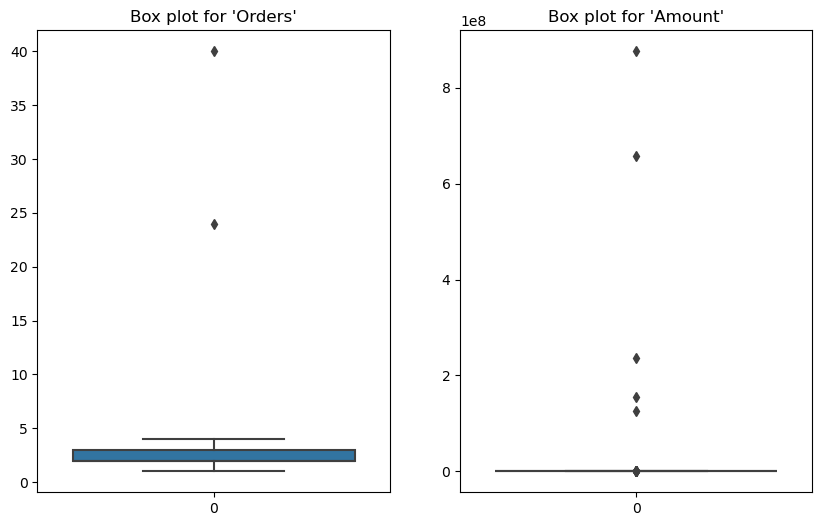

In [31]:
# Visulaization of outliers
fig,ax = plt.subplots(1,2, figsize = (10,6))
sns.boxplot(data = df['Orders'], ax = ax[0])
ax[0].set_title("Box plot for 'Orders'")

sns.boxplot(data = df['Amount'], ax = ax[1])
ax[1].set_title("Box plot for 'Amount'")


### Orders

In [32]:
# Quartile
Q1_order = np.quantile(df['Orders'], 0.25)
Q3_order = np.quantile(df['Orders'], 0.75)
IQR_order = Q3_order - Q1_order
#IQR_order
lower_limit_order = Q1_order - 1.5*IQR_order
upper_limit_order = Q3_order + 1.5*IQR_order


In [33]:
# Removing the outliers
df = df[(df['Orders'] > lower_limit_order) & (df['Orders'] < upper_limit_order)]
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125200e+04,11252.000000,11252.000000,11252.000000,1.125200e+04
mean,1.011889e+06,35.423303,0.419836,2.488891,1.917000e+05
std,2.979871e+05,12.753743,0.493554,1.114844,1.073001e+07
min,1.000001e+06,12.000000,0.000000,1.000000,1.880000e+02
25%,1.001496e+06,27.000000,0.000000,2.000000,5.444750e+03
50%,1.003064e+06,33.000000,0.000000,2.000000,8.113000e+03
75%,1.004429e+06,43.000000,1.000000,3.000000,1.269900e+04
max,1.100505e+07,92.000000,1.000000,4.000000,8.760212e+08


#### Amount

In [34]:
# Quartile
Q1_amount = np.quantile(df['Amount'], 0.25)
Q3_amount = np.quantile(df['Amount'], 0.75)
IQR_amount = Q3_amount - Q1_amount
#IQR_order
lower_limit_amount = Q1_amount - 1.5*IQR_amount
upper_limit_amount = Q3_amount + 1.5*IQR_amount

print(lower_limit_amount)
print(upper_limit_amount)

-5436.625
23580.375


In [35]:
# Removing the outliers
df = df[(df['Amount'] > lower_limit_amount) & (df['Amount'] < upper_limit_amount)]

In [36]:
# Saving the cleaned data
df.to_csv("CLeaned_dataset_of_Diwali_Sales.csv")


## Exploratory Data Ananlysis
### Statistical Analysis

In [37]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status
18,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
19,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married


In [38]:
df.describe()


,User_ID,Age,Marital_Status,Orders,Amount
count,1.123400e+04,11234.000000,11234.000000,11234.000000,11234.000000
mean,1.007453e+06,35.433772,0.419708,2.489496,9452.764638
std,2.109026e+05,12.759432,0.493533,1.114845,5213.784648
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001496e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.500000
75%,1.004429e+06,43.000000,1.000000,3.000000,12681.500000
max,1.100173e+07,92.000000,1.000000,4.000000,23568.000000


### Data Visualization
#### Gender Wise Analysis

In [39]:
data_gender_count = df.groupby(['Gender'], as_index = False)['Orders'].count()
print("Gender wise Purchase Power \n", data_gender_count)

data_gender_amount = df.groupby(['Gender'], as_index = False)['Amount'].sum()
print("Gender wise Purchase Power \n", data_gender_amount)


Gender wise Purchase Power 
   Gender  Orders
0      F    7835
1      M    3399
Gender wise Purchase Power 
   Gender       Amount
0      F  74422989.94
1      M  31769368.00


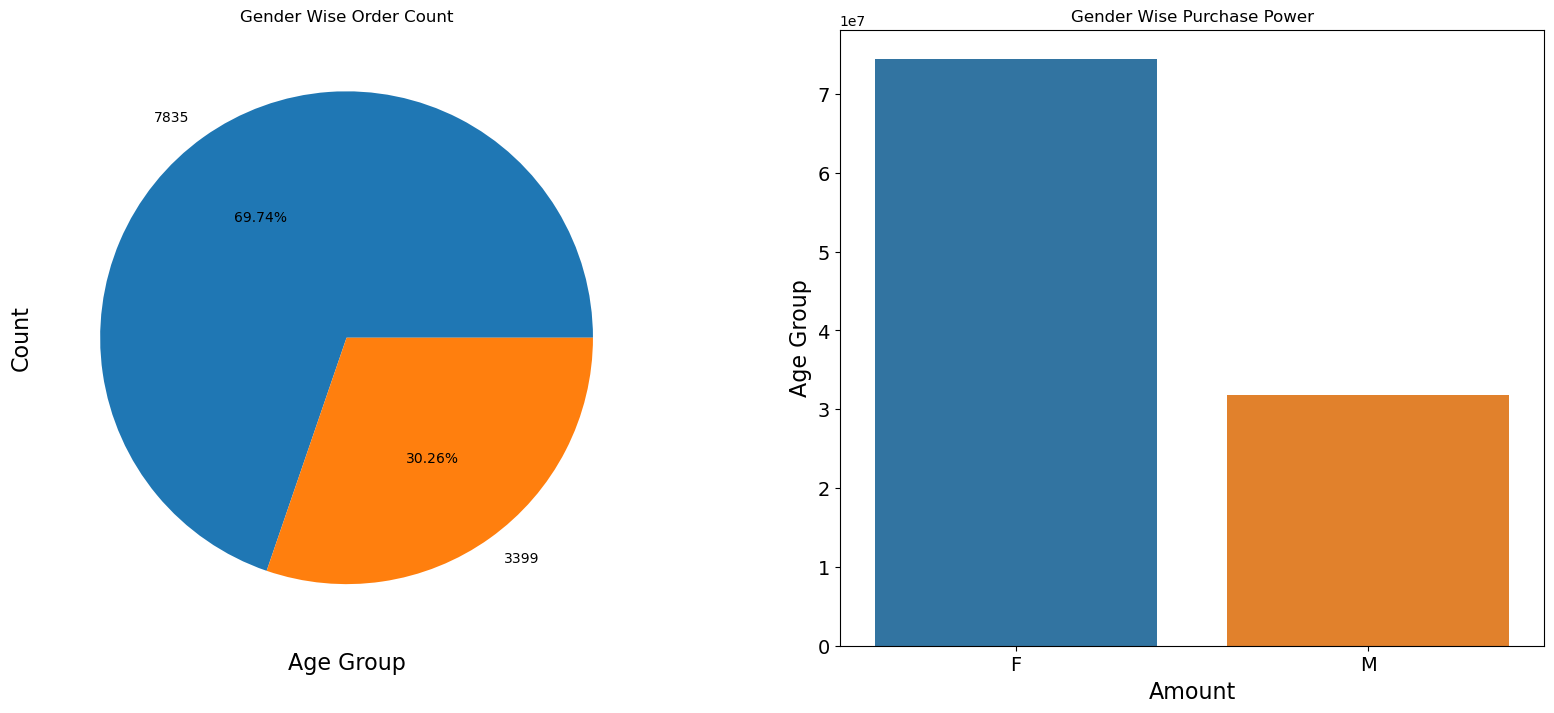

In [90]:
# Plotting
fig,ax = plt.subplots(1,2, figsize = (20,8))
# Pie Chart
ax[0].pie(x = data_gender_count['Orders'], labels = data_gender_count['Orders'], autopct = "%1.2f%%")
ax[0].set_title("Gender Wise Order Count")
ax[0].set_xlabel('Age Group', fontsize=16)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)
# Bar Chart
sns.barplot(x = 'Gender', y = 'Amount', data = data_gender_amount, ax = ax[1])
ax[1].set_title("Gender Wise Purchase Power")
ax[1].set_xlabel('Amount', fontsize=16)
ax[1].set_ylabel('Age Group', fontsize=16)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

plt.show()


#### Conclusion
##### The above two figures describes that 
- Females generally places more order and their purchase power is also higher


#### Marital Status Wise Analysis

In [41]:

# Plot data
data_marraige_status_amount = df.groupby(['marraige_status'], as_index = False)['Amount'].sum()
data_marraige_status_amount



,marraige_status,Amount
0,Married,44003938.00
1,Unmarried,62188419.94


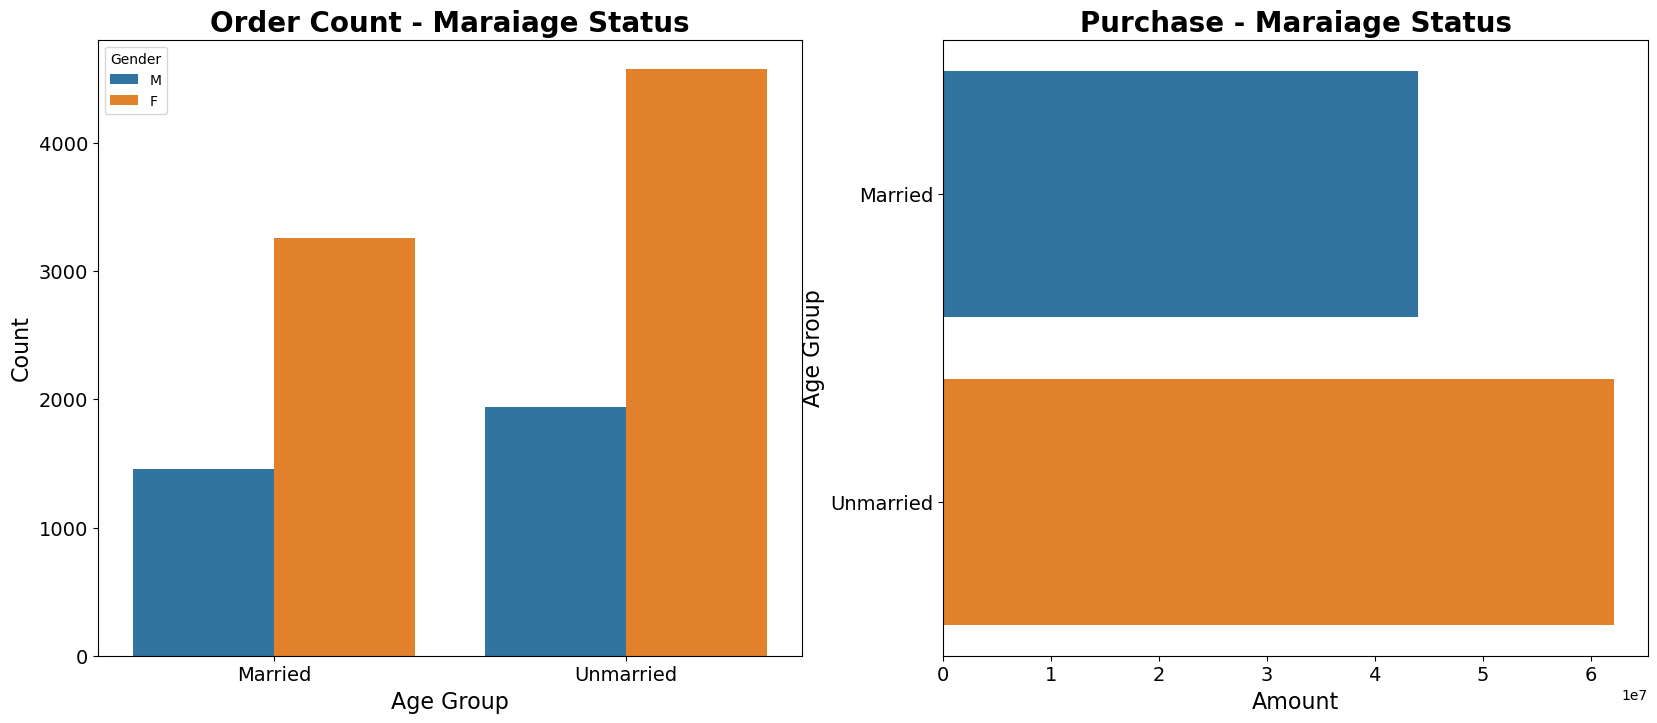

In [87]:
# Plots
fig, ax = plt.subplots(1,2, figsize = (20,8))

# Countplot
sns.countplot( x = 'marraige_status', hue = 'Gender', data = df, ax = ax[0])
ax[0].set_title('Order Count - Maraiage Status', fontsize=20,fontweight='bold')
ax[0].set_xlabel('Age Group', fontsize=16)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)
# Barplot for purchase power
sns.barplot(y = 'marraige_status', x = 'Amount', orient = 'h',
            data = data_marraige_status_amount, ax = ax[1])
ax[1].set_title('Purchase - Maraiage Status', fontsize=20,fontweight='bold')
ax[1].set_xlabel('Amount', fontsize=16)
ax[1].set_ylabel('Age Group', fontsize=16)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)
plt.show()


## Conclusion:
From this above two graphs, we can conclude that 
- Unmarried female places more order, then married female and then unmarried male.

#### Age Group Wise Analysis

In [43]:

# Plot data
data_age_group_amount = df.groupby(['Age Group'], as_index = False)['Amount'].sum()
data_age_group_amount

,Age Group,Amount
0,0-17,2696529.00
1,18-25,17032196.00
2,26-35,42603794.95
3,36-45,22234332.99
4,46-50,9245595.00
5,51-55,8278320.00
6,55+,4101590.00


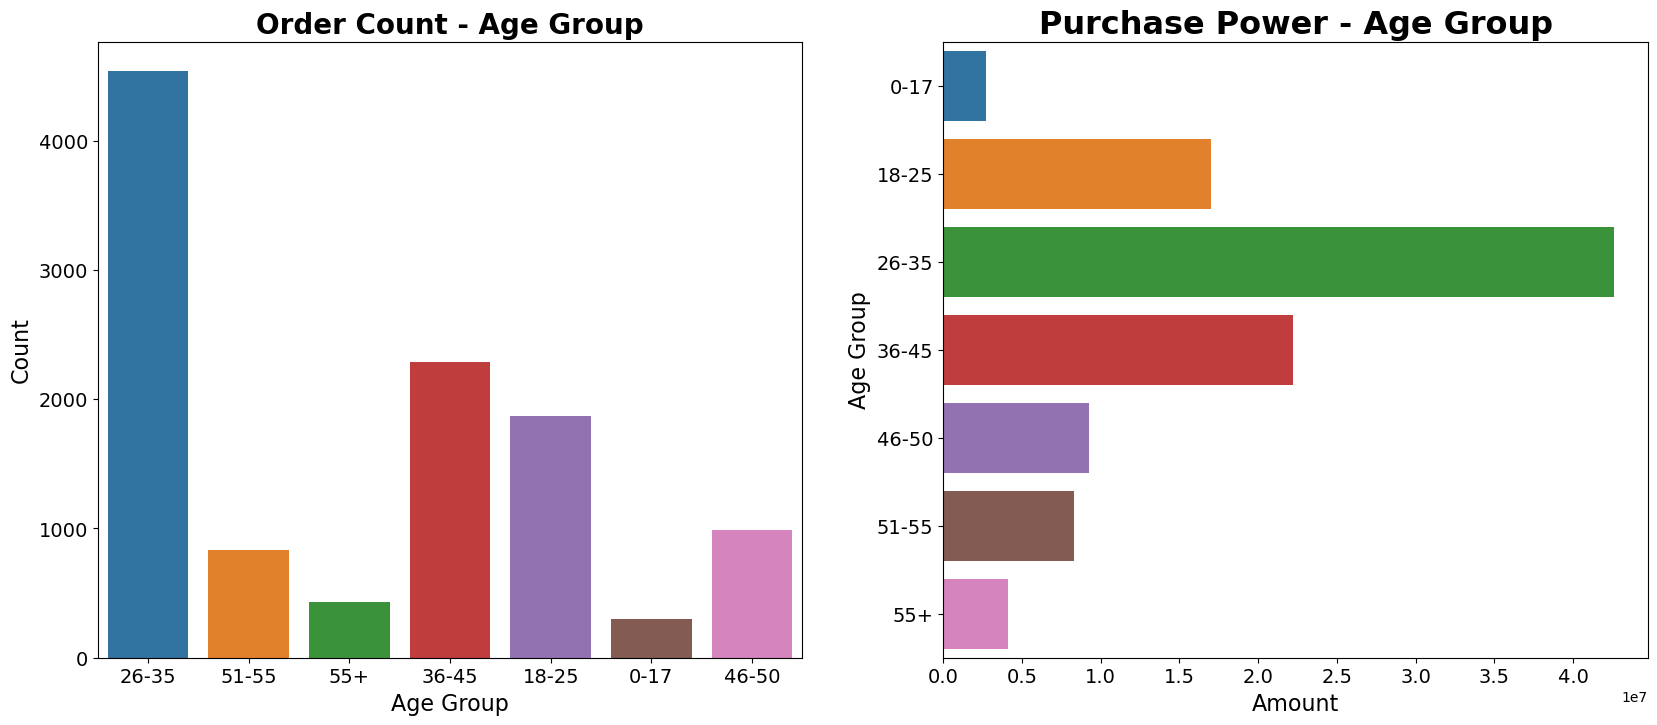

In [86]:

# Plots
fig, ax = plt.subplots(1,2, figsize = (20,8))

# Countplot
sns.countplot( x = 'Age Group', data = df, ax = ax[0],)
ax[0].set_title('Order Count - Age Group', fontsize=20,fontweight='bold')
ax[0].set_xlabel('Age Group', fontsize=16)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)
# Barplot for purchase power
sns.barplot(y = 'Age Group', x = 'Amount', orient = 'h',
            data = data_age_group_amount, ax = ax[1])
ax[1].set_title('Purchase Power - Age Group', fontsize=23
                ,fontweight='bold')
ax[1].set_xlabel('Amount', fontsize=16)
ax[1].set_ylabel('Age Group', fontsize=16)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

plt.show()


## **Conclusion**:
- 26-35 Age Group people places more order

### Product_Category Wise Analysis







In [45]:
df['Product_Category'].unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

In [46]:
data_product_category_sum= df.groupby(['Product_Category'], as_index = False)['Orders'].sum()
data_product_category_sum

,Product_Category,Orders
0,Auto,208.0
1,Beauty,1086.0
2,Books,245.0
3,Clothing & Apparel,6627.0
4,Decor,235.0
5,Electronics & Gadgets,5208.0
6,Food,6110.0
7,Footwear & Shoes,2701.0
8,Furniture,895.0
9,Games & Toys,940.0


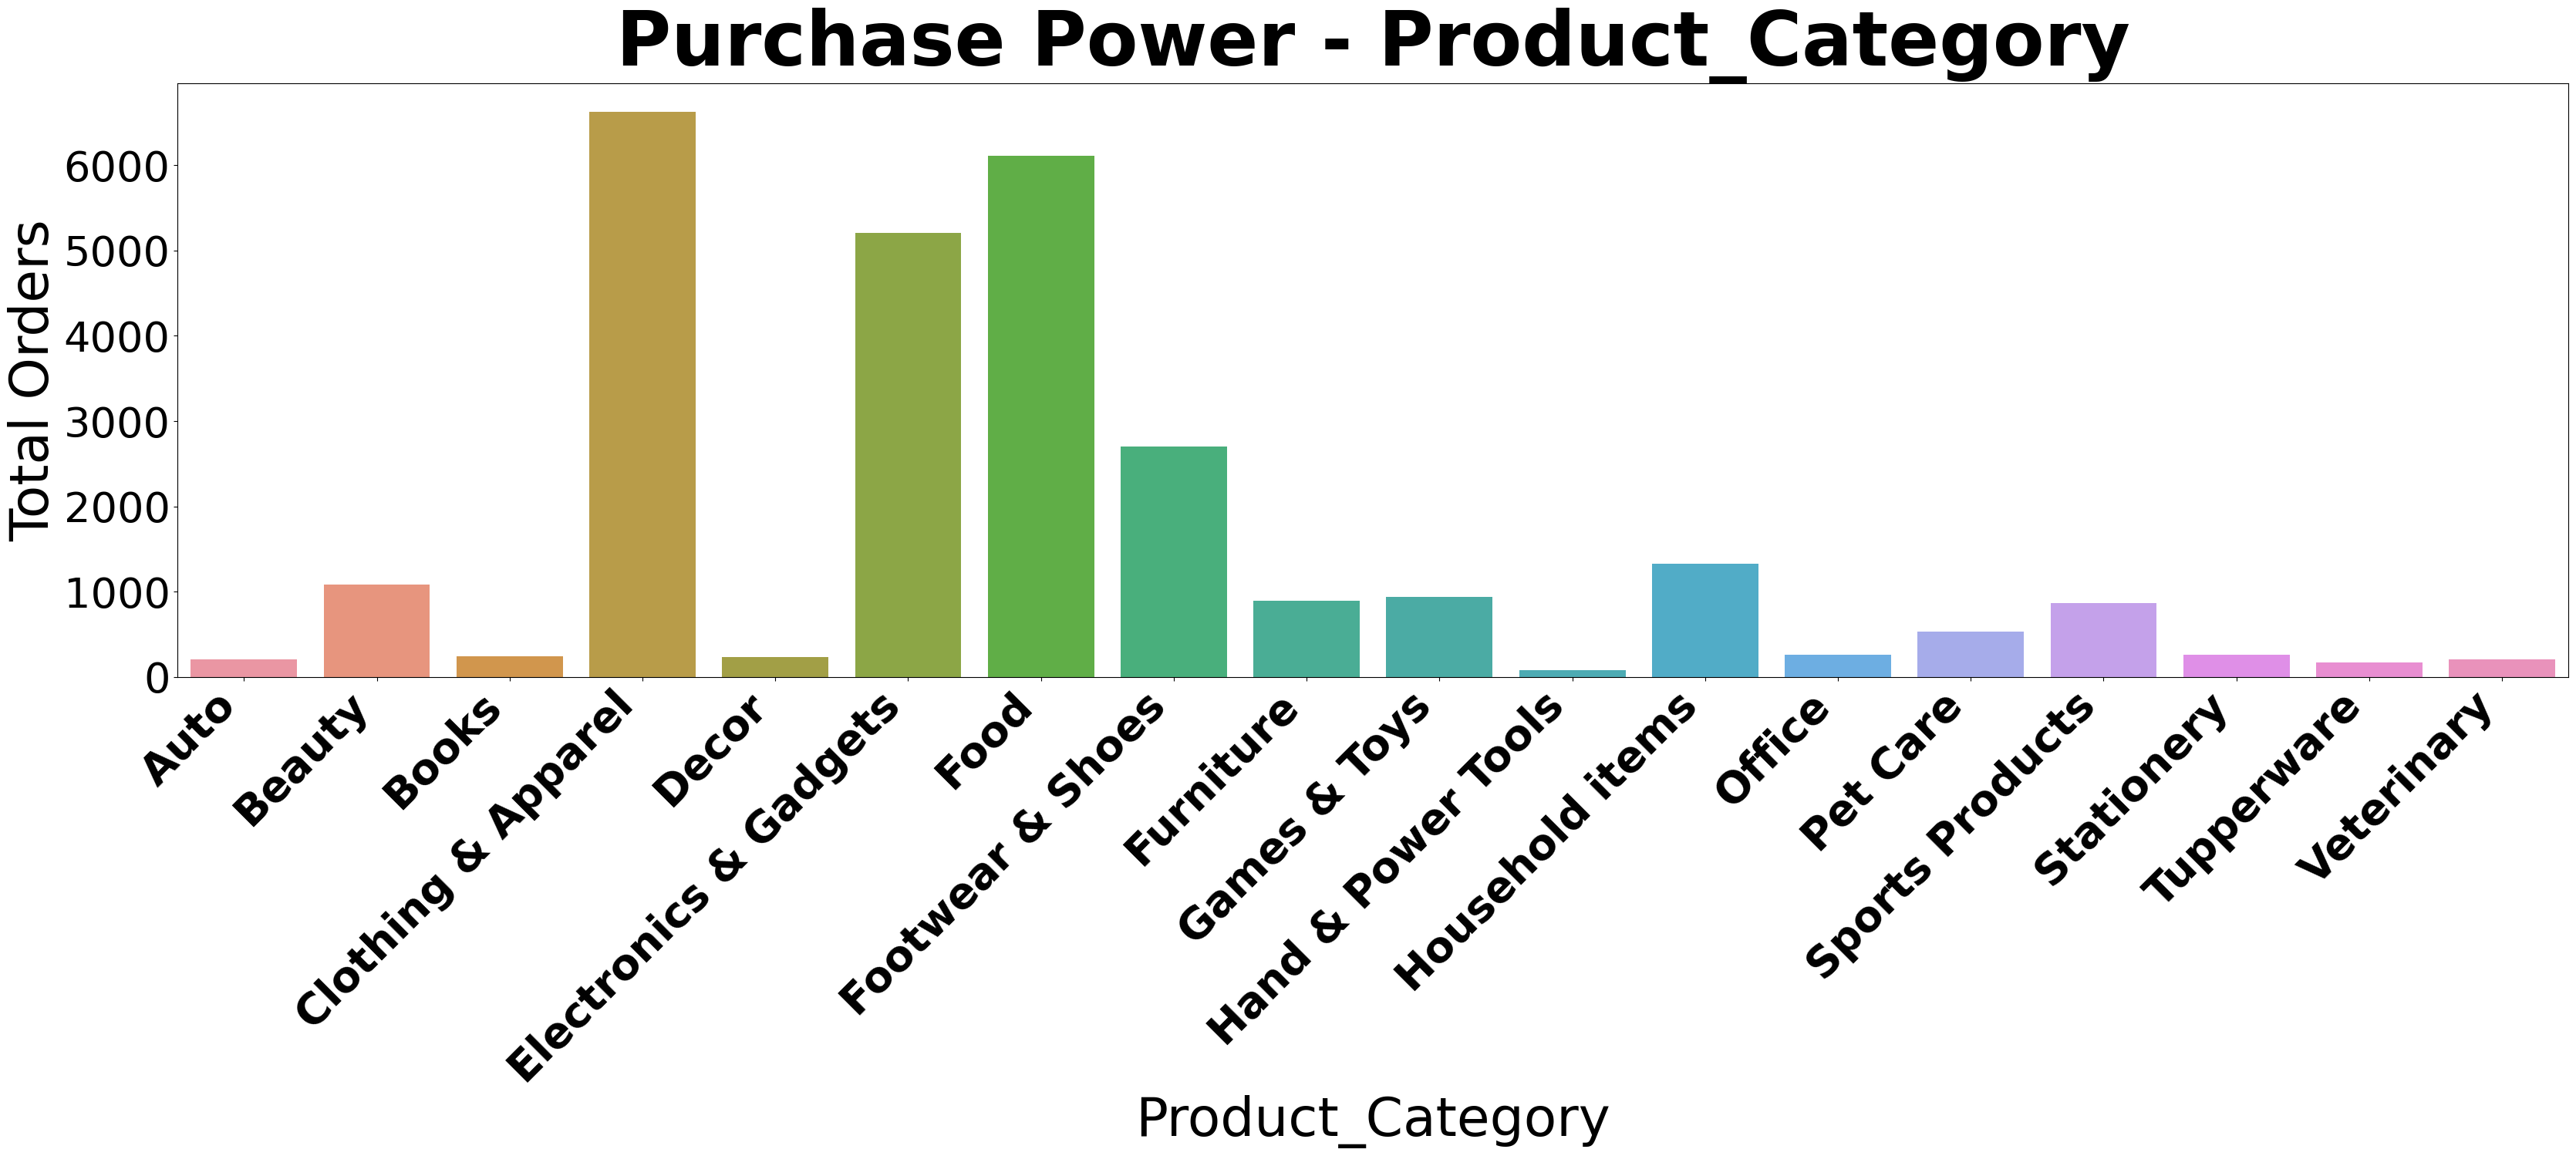

In [91]:
plt.figure(figsize = (40,10))
# Barplot for total purchase product_category wise
sns.barplot(y = 'Orders', x = 'Product_Category', orient = 'v',
            data = data_product_category_sum)
plt.title('Purchase Power - Product_Category', fontsize=70
                ,fontweight='bold')
plt.xlabel('Product_Category',fontsize=50)
plt.ylabel('Total Orders',fontsize=50)
plt.xticks(rotation=45, ha='right', fontsize=40,fontweight='bold')
plt.yticks(fontsize=39)
plt.show()

## Conclusion 
- ####  From above graph, we can conclude that Mostly **Clothing & Apparel** have been ordered by people in Diwali.

### State Wise Analysis

In [48]:
data_state_wise_orders = df.groupby(['State'], as_index = False)['Orders'].sum()

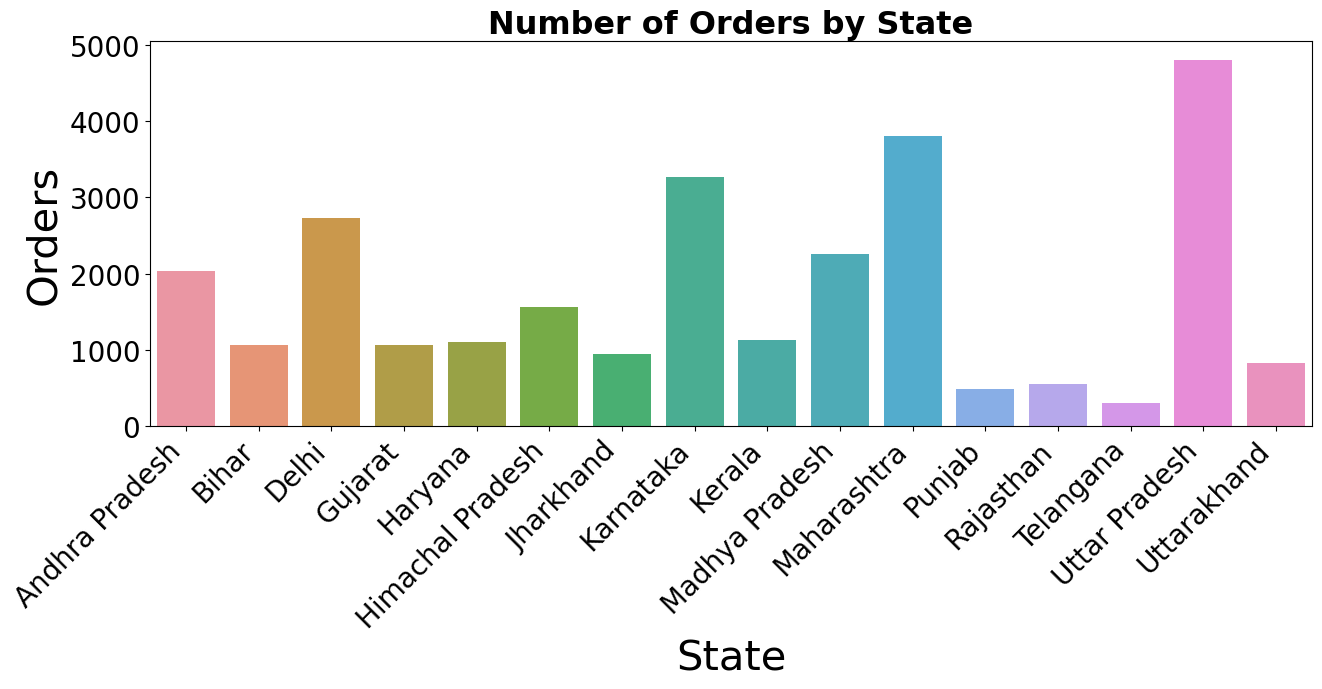

In [72]:
# Create the bar plot
plt.figure(figsize=(15, 5))
sns.barplot(x='State', y='Orders', data=data_state_wise_orders)
plt.title('Number of Orders by State', fontsize=23, fontweight='bold')
plt.xlabel('State', fontsize=30)
plt.ylabel('Orders', fontsize=30)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.show()

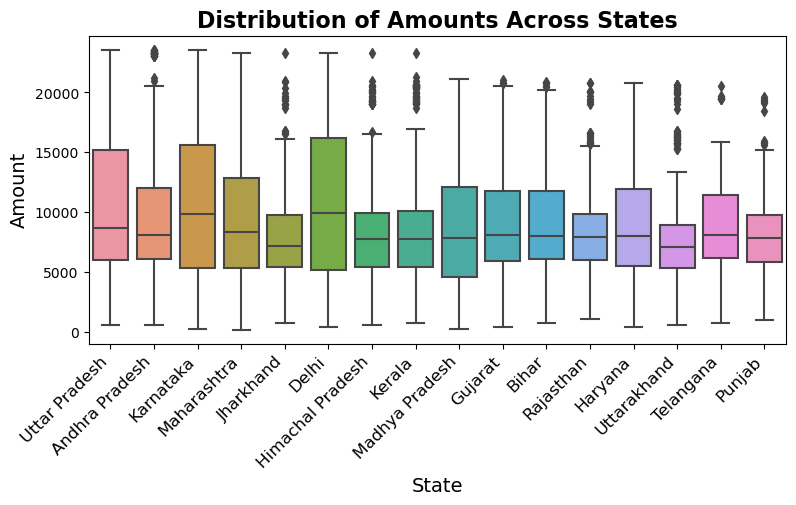

In [70]:
# Create the box plot
plt.figure(figsize=(9, 4))
sns.boxplot(x='State', y='Amount', data=df)
plt.title('Distribution of Amounts Across States', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

## Conclusion
- ##### The above graphs conclude that **Uttar Pradesh** is the state which has most of the Sales in Diwali. 

### Occupation  Wise Analysis

In [93]:
data_occupation_wise_amount = df.groupby(['Occupation'], as_index = False)['Orders'].sum()
print("Occupation wise Purchase Power \n", data_occupation_wise_amount)


Occupation wise Purchase Power 
          Occupation  Orders
0       Agriculture   717.0
1        Automobile  1367.0
2          Aviation  3211.0
3           Banking  2819.0
4          Chemical  1312.0
5      Construction  1018.0
6   Food Processing  1072.0
7              Govt  2144.0
8        Healthcare  3453.0
9       Hospitality  1738.0
10        IT Sector  4009.0
11           Lawyer  1343.0
12            Media  1597.0
13           Retail  1273.0
14          Textile   894.0


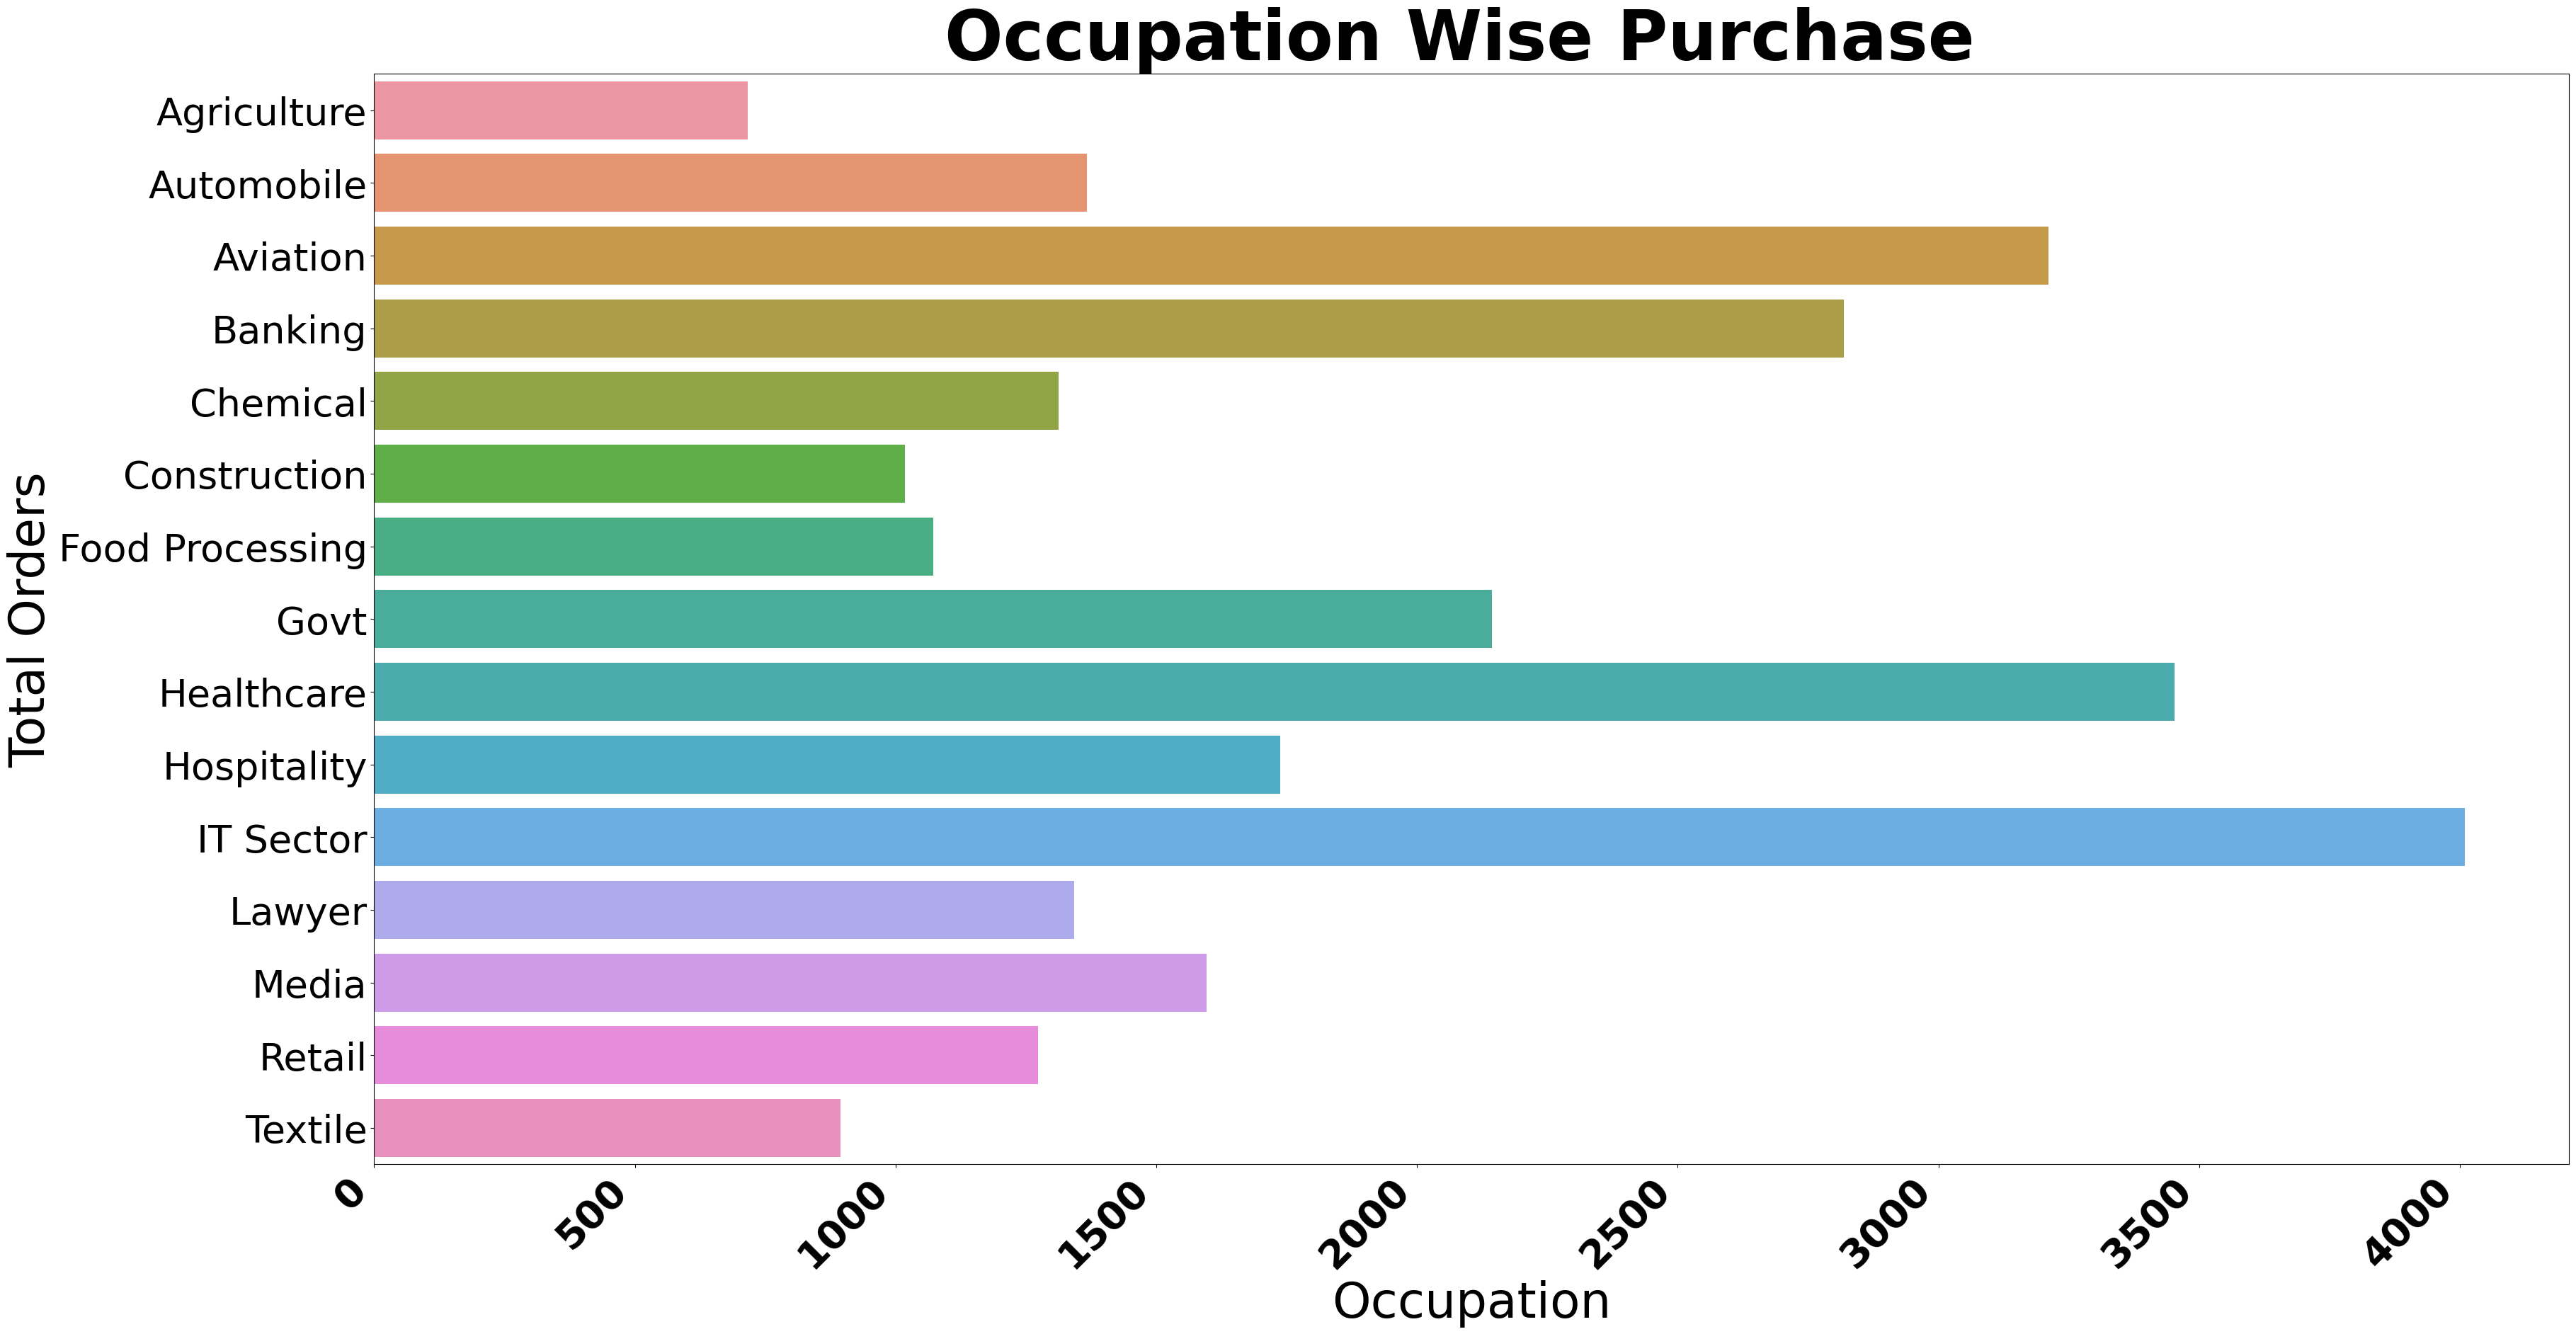

In [94]:
plt.figure(figsize = (40,20))
# Barplot for total purchase product_category wise
sns.barplot(y = 'Occupation', x = 'Orders', orient = 'h',
            data = data_occupation_wise_amount)
plt.title('Occupation Wise Purchase ', fontsize=70
                ,fontweight='bold')
plt.xlabel('Occupation',fontsize=50)
plt.ylabel('Total Orders',fontsize=50)
plt.xticks(rotation=45, ha='right', fontsize=40,fontweight='bold')
plt.yticks(fontsize=39)
plt.show()

##  Conclusion:
- #### In above graph, people working in the IT SECTOR has bought most of the products in these Diwali.